In [1]:
%load_ext autoreload
%autoreload 2
%xmode verbose

Exception reporting mode: Verbose


In [2]:
from papertrades import *

In [3]:
p = Portfolio(10000, 'portfolio.csv')
print(p.trades)

Empty DataFrame
Columns: [symbol, order_type, quantity, price]
Index: []


In [4]:
p.trade(
    symbol = 'NVDA',
    order_type = True,
    quantity = 10,
    price = 100,
    order_time = None
) # automatically uses rounded time
p.trades

,symbol,order_type,quantity,price
order_time,,,,
1750259182,NVDA,True,10,100


In [5]:
p.trade(
    symbol = 'NVDA',
    order_type = False,
    quantity = 10,
    price = 110,
    order_time = time.time() + 86400 / 2 # simulates half a day ahead
)
p.trades

,symbol,order_type,quantity,price
order_time,,,,
1750259182,NVDA,True,10,100
1750302382,NVDA,False,10,110


In [6]:
'''
Started at 10000
>>> bought 10 * 100 --> -1000
>>> sold 10 * 110 --> +1100
'''
p.get_balance() # remaining cash in your account

np.int64(10100)

In [7]:
p.get_balance_over_time() # not very useful for plotting

[10000, np.int64(9000), np.int64(10100)]

In [8]:
p.get_value(), p.get_value_over_time() # the value is the total value of all your assets based on the last trade you input

(10100, [10000, 10000, 10100])

In [9]:
import random

for i in range(3):
    p.trade(
        symbol = 'NVDA',
        order_type = True,
        quantity = 10,
        price = 100 + random.randint(-10, 10),
        order_time = time.time() + (2 * i + 1) * 86400
    )

    p.trade(
        symbol = 'NVDA',
        order_type = False,
        quantity = 10,
        price = 103 + random.randint(-10, 10),
        order_time = time.time() + (2 * i + 2) * 86400
    )

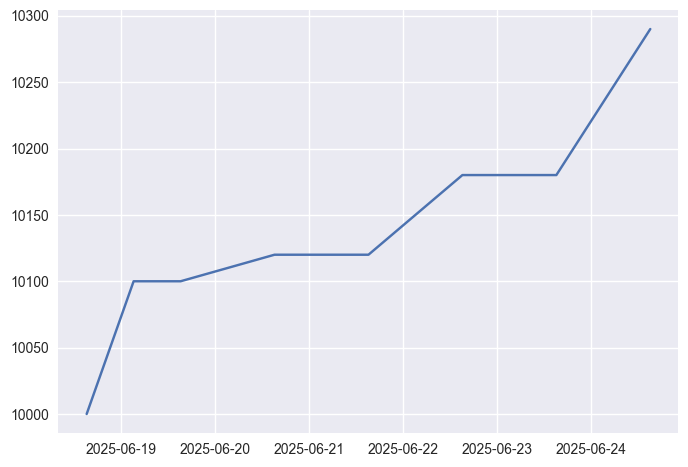

In [10]:
p.plot_value_over_time()

In [11]:
p.save_trades()

In [12]:
p2 = Portfolio(10000, 'portfolio.csv') # just make sure to use the same starting balance
p2.load_trades()
p2.trades

,symbol,order_type,quantity,price
order_time,,,,
1750259182,NVDA,True,10,100
1750302382,NVDA,False,10,110
1750345582,NVDA,True,10,97
1750431982,NVDA,False,10,99
1750518382,NVDA,True,10,91
1750604782,NVDA,False,10,97
1750691182,NVDA,True,10,100
1750777582,NVDA,False,10,111


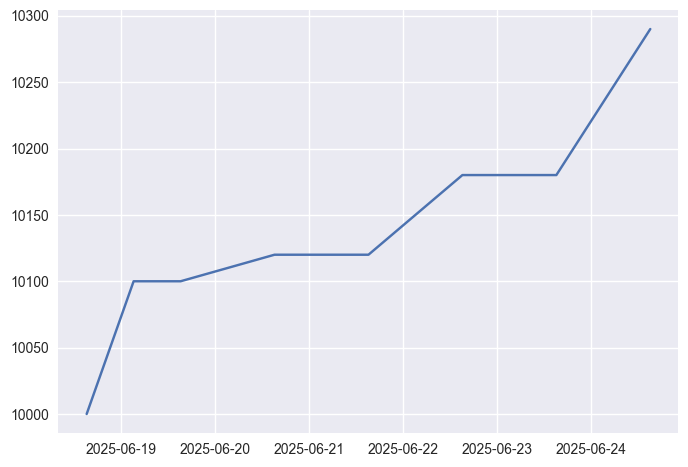

In [13]:
p2.plot_value_over_time()
plot.show()

In [14]:
p3 = Portfolio(1000, 'portfolio3.csv')

p3.trade(
    symbol = 'MSFT',
    order_type = True,
    quantity = 1,
    price = 350
)
p3.trade(
    symbol = 'AAPL',
    order_type = True,
    quantity = 1,
    price = 200
)

p3.get_all_assets(), p3.get_latest_asset_prices(), p3.get_asset_values(), p3.get_total_asset_values()

({'MSFT': 1, 'AAPL': 1},
 {'AAPL': 200, 'MSFT': 350},
 {'MSFT': 350, 'AAPL': 200},
 550)

In [15]:
p3.trade(
    symbol = 'MSFT',
    order_type = False,
    quantity = 1,
    price = 400,
    order_time = time.time() + 86400 * 3
)
p3.trade(
    symbol = 'AAPL',
    order_type = False,
    quantity = 1,
    price = 300,
    order_time = time.time() + 86400 * 3
)

p3.get_all_assets(), p3.get_latest_asset_prices(), p3.get_asset_values(), p3.get_total_asset_values(), p3.get_balance()

({'MSFT': 0, 'AAPL': 0}, {'AAPL': 300, 'MSFT': 400}, {}, 0, np.int64(1150))

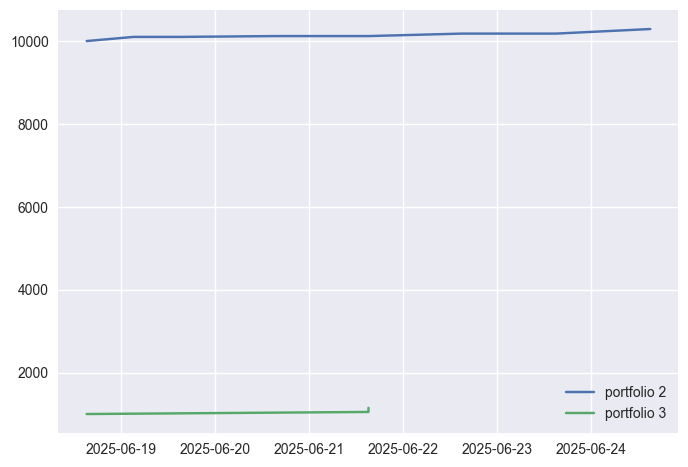

In [19]:
p2.plot_value_over_time()
p3.plot_value_over_time()
plot.legend(['portfolio 2', 'portfolio 3'])
plot.show() # comparison doesn't account for percent change

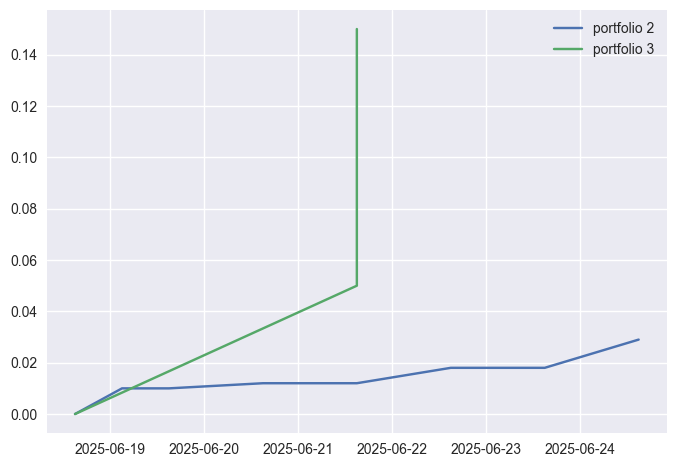

In [18]:
p2.plot_growth_over_time()
p3.plot_growth_over_time()
plot.legend(['portfolio 2', 'portfolio 3'])
plot.show() # comparison doesn't account for percent change